In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/apartment_cost_list.csv')

In [3]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [4]:
df.shape

(19613, 18)

In [5]:
df.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
       'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
       'Job Description'],
      dtype='object')

In [6]:
null_counts = df.isnull().sum()
null_counts

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [7]:
# null_count percentage
(null_counts/len(df))*100

Job #                      0.000000
Borough                    0.000000
House #                    0.000000
Street Name                0.000000
Block                      0.000000
Lot                        0.000000
Bin #                      0.000000
Job Type                   0.000000
Community - Board          0.000000
Curb Cut                  99.918421
Fully Permitted           20.333452
Initial Cost               0.000000
Proposed Zoning Sqft       0.000000
Horizontal Enlrgmt        99.168919
Vertical Enlrgmt          98.766125
Enlargement SQ Footage     0.000000
Zoning Dist1              10.686789
Job Description            0.000000
dtype: float64

In [8]:
df.duplicated().sum()

6104

In [9]:
df = df.drop_duplicates()

In [10]:
df.drop(columns=['Curb Cut'], inplace=True)
df.drop(columns=['Job Description'], inplace=True)

In [11]:
df.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Fully Permitted', 'Initial Cost',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Zoning Dist1'],
      dtype='object')

In [12]:
print("No of unique features in the columns:")
for columns in df.columns:
    print(columns,df[columns].nunique())

No of unique features in the columns:
Job # 13403
Borough 5
House # 1959
Street Name 2580
Block 2493
Lot 265
Bin # 6819
Job Type 3
Community - Board 59
Fully Permitted 4392
Initial Cost 46
Proposed Zoning Sqft 331
Horizontal Enlrgmt 1
Vertical Enlrgmt 2
Enlargement SQ Footage 229
Zoning Dist1 145


In [13]:
df['Borough'].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [14]:
df['Borough'].value_counts()

MANHATTAN        10697
BROOKLYN          1870
QUEENS             561
BRONX              357
STATEN ISLAND       24
Name: Borough, dtype: int64

In [15]:
df['Job Type'].unique()

array(['A2', 'A1', 'A3'], dtype=object)

In [16]:
df['Job Type'].value_counts()

A2    12528
A1      940
A3       41
Name: Job Type, dtype: int64

In [17]:
df['Street Name'].nunique()

2580

In [18]:
df['Horizontal Enlrgmt'].unique()

array([nan, 'Y'], dtype=object)

In [19]:
df['Horizontal Enlrgmt'].value_counts()

Y    106
Name: Horizontal Enlrgmt, dtype: int64

In [20]:
df['Vertical Enlrgmt'].unique()

array([nan, 'Y', 'N'], dtype=object)

In [21]:
df['Vertical Enlrgmt'].value_counts()

Y    174
N      1
Name: Vertical Enlrgmt, dtype: int64

In [22]:
df['Proposed Zoning Sqft'].value_counts()

0         13149
1             5
142261        3
4000          3
26361         3
          ...  
2968          1
32000         1
70000         1
20217         1
15261         1
Name: Proposed Zoning Sqft, Length: 331, dtype: int64

In [23]:
df['Zoning Dist1'].unique()

array(['C1-9', 'R8B', 'R6', nan, 'C4-3', 'R6B', 'R5', 'R8', 'R9A', 'C1-5',
       'R10', 'R10A', 'C2-3', 'C5-1', 'R8A', 'R10-', 'M1-6', 'C4-5',
       'C1-8X', 'C2-5', 'R7-2', 'R6A', 'M1-1', 'R7A', 'R7-1', 'R7B',
       'C1-6', 'C1-1', 'C6-4', 'R4', 'C1-3', 'C5-5', 'M1-2', 'C1-2',
       'C1-9A', 'R5B', 'C2-6', 'R8X', 'R3-2', 'C2-2', 'C6-2A', 'C2-8',
       'C5-3', 'C6-2', 'C1-4', 'C6-2G', 'R4-1', 'C1-6A', 'C6-1', 'M1-4',
       'C6-2M', 'M1-5M', 'M1-2/R6B', 'C4-4A', 'M1-5B', 'R10H', 'C4-6A',
       'C5-2', 'M1-5', 'R4A', 'R3-1', 'C2-4', 'C4-2', 'M3-1', 'C2-8A',
       'C4-2A', 'M1-2/R6A', 'R9', 'R3A', 'C1-7A', 'C4-3A', 'C6-6',
       'C6-4M', 'C5-2.5', 'C6-3A', 'C5-2A', 'C7', 'R5D', 'C6-4A', 'C8-1',
       'C2-7A', 'M1-5A', 'M1-3D', 'C6-3', 'C1-8A', 'C5-P', 'R1-2', 'R7X',
       'R3X', 'C8-4', 'C1-8', 'C4-7', 'R9X', 'C6-6.5', 'C6-4X', 'C3A',
       'C1-7', 'C5-1A', 'C6-3X', 'M2-1', 'BPC', 'C4-4', 'C6-1G', 'C6-9',
       'C6-5', 'C6-7T', 'C8-2', 'C4-4D', 'C4-6', 'M1-2/R5D', 'M1-4/R6B',

In [24]:
# Calculate mode for 'Fully Permitted' and 'Proposed Zoning Sqft'
fully_permitted_mode = df['Fully Permitted'].mode()[0]
zoning_dist1_mode = df['Zoning Dist1'].mode()[0]

# Fill NaN values with mode
df['Fully Permitted'].fillna(fully_permitted_mode, inplace=True)
df['Zoning Dist1'].fillna(zoning_dist1_mode, inplace=True)

In [25]:
df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Fully Permitted               0
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        13403
Vertical Enlrgmt          13334
Enlargement SQ Footage        0
Zoning Dist1                  0
dtype: int64

In [26]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\dmish\AppData\Local\Temp\ipykernel_25604\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Job #,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
Job #,1.000000,0.476994,-0.153952,0.989307,0.990528,0.075480,0.045041
Block,0.476994,1.000000,-0.127521,0.509134,0.501855,0.042292,0.042052
Lot,-0.153952,-0.127521,1.000000,-0.147756,-0.158962,-0.011735,-0.020556
Bin #,0.989307,0.509134,-0.147756,1.000000,0.997876,0.074599,0.053393
Community - Board,0.990528,0.501855,-0.158962,0.997876,1.000000,0.074547,0.053480
Proposed Zoning Sqft,0.075480,0.042292,-0.011735,0.074599,0.074547,1.000000,0.008344
Enlargement SQ Footage,0.045041,0.042052,-0.020556,0.053393,0.053480,0.008344,1.000000


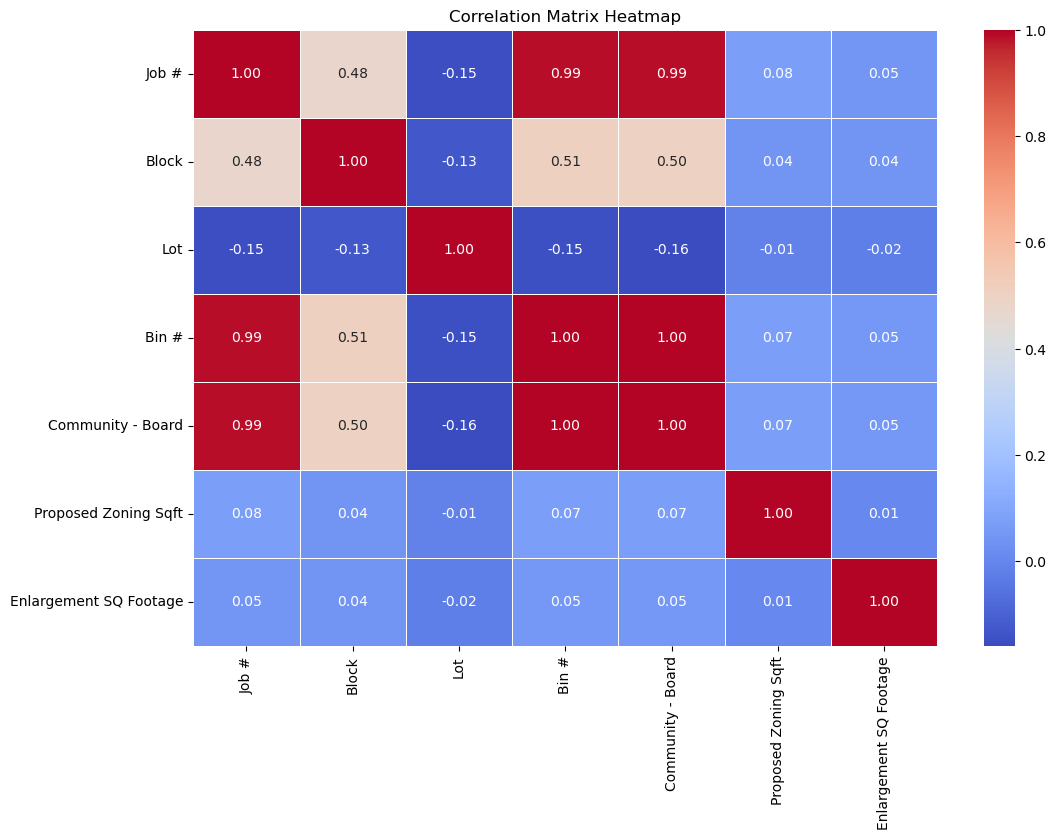

In [27]:
# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
#since highly correalted with other 
columns_to_drop = ['Bin #','Community - Board']
# Check if the columns exist in the DataFrame before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop_existing, errors='ignore')
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Job Type,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,A2,01/29/2003,$65000.00,0,NaN,NaN,0,C1-9
1,140922893,MANHATTAN,160,E 89 ST,1517,43,A2,07/14/2020,$85000.00,0,NaN,NaN,0,R8B
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,A1,05/23/2007,$60000.00,0,NaN,NaN,0,R6
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,A2,02/28/2006,$75000.00,0,NaN,NaN,0,R8B
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,A1,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3


In [29]:
# Filter rows where 'Horizontal Enlrgmt' and 'Vertical Enlrgmt' are not null
filtered_data1 = df[df['Horizontal Enlrgmt'].notnull() | df['Vertical Enlrgmt'].notnull()]

In [30]:
len(filtered_data1)

263

In [31]:
filtered_data1

,Job #,Borough,House #,Street Name,Block,Lot,Job Type,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1
45,302138247,BROOKLYN,146,SACKETT STREET,336,16,A1,01/29/2003,$60000.00,0,NaN,Y,1570,R6
61,302175982,BROOKLYN,7901,4 AVENUE,5980,1,A1,02/12/2010,$80000.00,0,Y,NaN,1080,R7-1
67,302187700,BROOKLYN,6014,7 AVENUE,5784,43,A1,01/29/2003,$80000.00,0,Y,Y,462,C1-1
122,302271912,BROOKLYN,247,VAN BRUNT STREET,522,3,A1,04/22/2008,$50000.00,0,Y,Y,2250,M1-1
130,302282278,BROOKLYN,1609,MERMAID AVENUE,7021,46,A1,07/02/2007,$60000.00,4159,Y,Y,440,R6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,104828572,MANHATTAN,116,WEST 75 STREET,1146,42,A1,09/11/2008,$40000.00,0,NaN,Y,810,R8B
19256,104892699,MANHATTAN,103,WEST 77 STREET,1149,30,A1,09/14/2009,$62000.00,0,Y,NaN,133,C1-8A
19371,110046165,MANHATTAN,133,EAST 15 STREET,871,30,A2,09/11/2008,$70000.00,0,NaN,Y,248,R8B
19384,110051318,MANHATTAN,108,WEST 69 STREET,1140,36,A1,04/23/2010,$40000.00,0,NaN,Y,264,C1-8


In [32]:
# Filter rows where 'Horizontal Enlrgmt' and 'Vertical Enlrgmt' are null
filtered_data2 = df[df['Horizontal Enlrgmt'].isnull() & df['Vertical Enlrgmt'].isnull()]

In [33]:
len(filtered_data2)

13246

In [34]:
filtered_data2

,Job #,Borough,House #,Street Name,Block,Lot,Job Type,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,A2,01/29/2003,$65000.00,0,NaN,NaN,0,C1-9
1,140922893,MANHATTAN,160,E 89 ST,1517,43,A2,07/14/2020,$85000.00,0,NaN,NaN,0,R8B
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,A1,05/23/2007,$60000.00,0,NaN,NaN,0,R6
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,A2,02/28/2006,$75000.00,0,NaN,NaN,0,R8B
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,A1,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19605,123847409,MANHATTAN,225,CENTRAL PARK WEST,1196,29,A2,06/11/2020,$60000.00,0,NaN,NaN,0,R10A
19607,141021631,MANHATTAN,51,5TH AVENUE,569,5,A2,12/09/2022,$40000.00,0,NaN,NaN,0,R10
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,A2,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A
19610,102937342,MANHATTAN,166,BANK STREET,638,4,A2,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2


In [35]:
filtered_data2['Enlargement SQ Footage'].value_counts()

0    13246
Name: Enlargement SQ Footage, dtype: int64

In [36]:
df['Horizontal Enlrgmt'].value_counts()

Y    106
Name: Horizontal Enlrgmt, dtype: int64

In [37]:
df['Vertical Enlrgmt'].value_counts()

Y    174
N      1
Name: Vertical Enlrgmt, dtype: int64

In [38]:
# label text column values to numerical

In [39]:
columns_to_transform = ['Horizontal Enlrgmt', 'Vertical Enlrgmt']

In [40]:
df[columns_to_transform] = df[columns_to_transform].replace({'Y': 1, 'N': 0}).fillna(0)

In [41]:
# Remove the dollar sign and convert the 'Initial Cost' column to numeric
df['Initial Cost'] = pd.to_numeric(df['Initial Cost'].str.replace('$', '', regex=False), errors='coerce')

In [42]:
df.dtypes

Job #                       int64
Borough                    object
House #                    object
Street Name                object
Block                       int64
Lot                         int64
Job Type                   object
Fully Permitted            object
Initial Cost              float64
Proposed Zoning Sqft        int64
Horizontal Enlrgmt        float64
Vertical Enlrgmt          float64
Enlargement SQ Footage      int64
Zoning Dist1               object
dtype: object

In [43]:
df['House #'] = pd.to_numeric(df['House #'], errors='coerce')

In [44]:
df.isnull().sum()

Job #                       0
Borough                     0
House #                   564
Street Name                 0
Block                       0
Lot                         0
Job Type                    0
Fully Permitted             0
Initial Cost                0
Proposed Zoning Sqft        0
Horizontal Enlrgmt          0
Vertical Enlrgmt            0
Enlargement SQ Footage      0
Zoning Dist1                0
dtype: int64

In [45]:
df['House #'].fillna(df['House #'].median(), inplace=True)

In [46]:
df.isnull().sum()

Job #                     0
Borough                   0
House #                   0
Street Name               0
Block                     0
Lot                       0
Job Type                  0
Fully Permitted           0
Initial Cost              0
Proposed Zoning Sqft      0
Horizontal Enlrgmt        0
Vertical Enlrgmt          0
Enlargement SQ Footage    0
Zoning Dist1              0
dtype: int64

In [47]:
df['Fully Permitted'] = pd.to_datetime(df['Fully Permitted'], errors='coerce')

In [48]:
df['year'] = df['Fully Permitted'].dt.year
df['month'] = df['Fully Permitted'].dt.month
df['day'] = df['Fully Permitted'].dt.day

In [49]:
df.drop(columns=['Fully Permitted'], inplace=True)

In [50]:
# Label the categorical column

In [51]:
df['Job Type'] = df['Job Type'].replace({'A2': 0, 'A1': 1, 'A3': 2})

In [52]:
df['Borough'] = df['Borough'].replace({'MANHATTAN': 0, 'BROOKLYN': 1, 'BRONX': 2, 'QUEENS': 3, 'STATEN ISLAND': 4})

In [53]:
from sklearn.preprocessing import LabelEncoder
zoning_dist_encoder = LabelEncoder()
street_name_encoder = LabelEncoder()
df['Zoning Dist1'] = zoning_dist_encoder.fit_transform(df['Zoning Dist1'])
df['Street Name'] = street_name_encoder.fit_transform(df['Street Name'])

In [54]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Job Type,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,year,month,day
0,123768976,0,1598.0,121,1545,49,0,65000.0,0,0.0,0.0,0,13,2003,1,29
1,140922893,0,160.0,723,1517,43,0,85000.0,0,0.0,0.0,0,140,2020,7,14
2,301773579,1,65.0,1289,1962,86,1,60000.0,0,0.0,0.0,0,129,2007,5,23
3,301976057,1,1401.0,1597,7584,35,0,75000.0,0,0.0,0.0,0,140,2006,2,28
4,301989276,1,154.0,1576,2573,10,1,40000.0,0,0.0,0.0,0,30,2006,9,29


In [59]:
numeric_columns = ['Job #', 'House #', 'Block', 'Lot', 'Initial Cost', 'Enlargement SQ Footage']

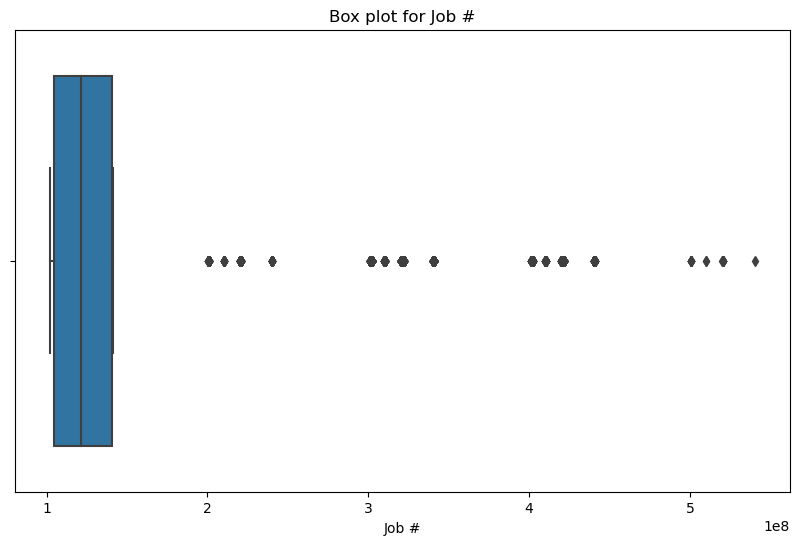

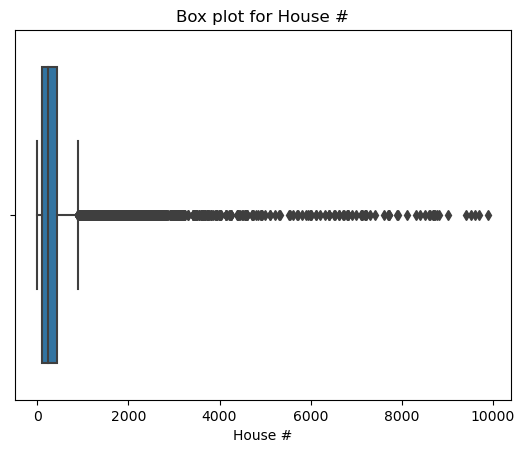

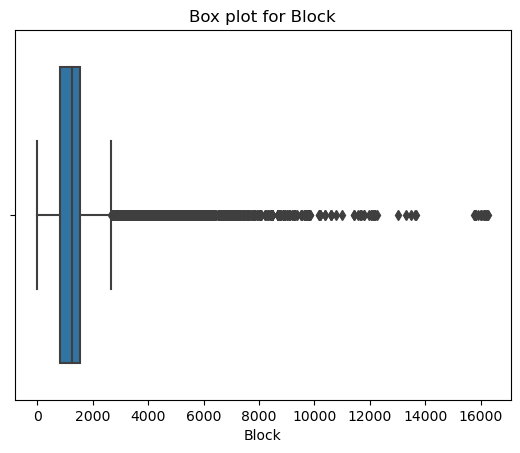

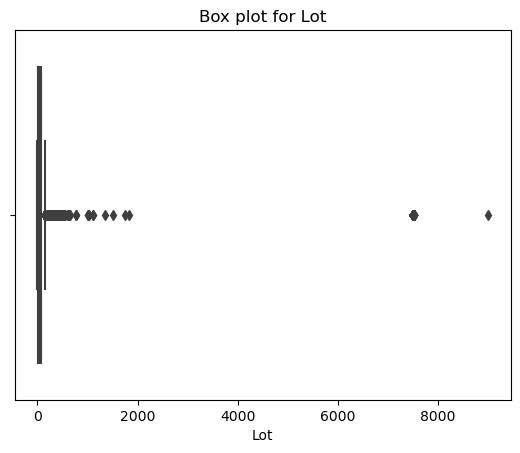

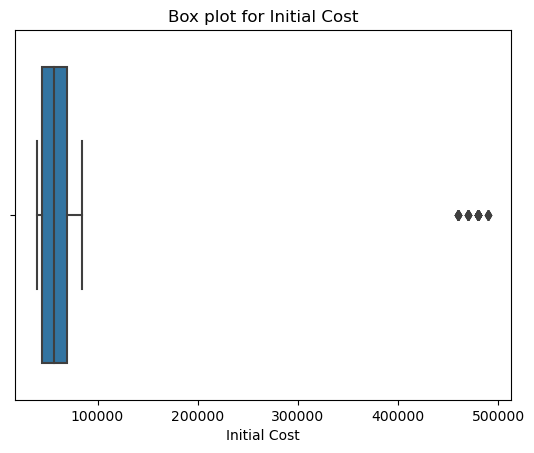

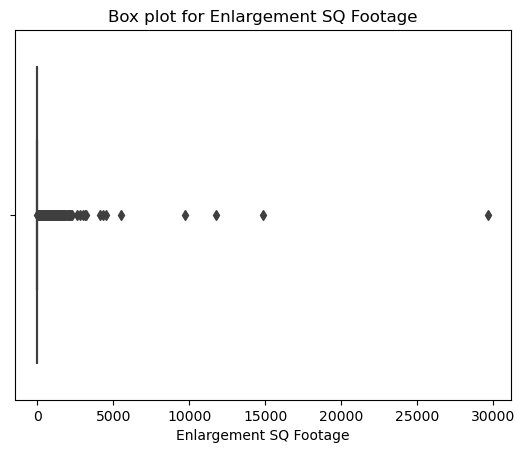

In [60]:
# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [61]:
import numpy as np

# function to impute outliers with the median
def impute_outliers_with_median(column):
    column_copy = column.copy()  # Create a copy of the column
    median = column_copy.median()
    std_dev = column_copy.std()
    
    # Identify outliers using a z-score threshold 
    z_scores = (column_copy - median) / std_dev
    outliers = np.abs(z_scores) > 3
    
    # Replace outliers with the median
    column_copy[outliers] = median
    
    return column_copy

# Apply the function to each column
df['Block'] = impute_outliers_with_median(df['Block'])
df['Job #'] = impute_outliers_with_median(df['Job #'])
df['Lot'] = impute_outliers_with_median(df['Lot'])
df['Proposed Zoning Sqft'] = impute_outliers_with_median(df['Proposed Zoning Sqft'])
df['House #'] = impute_outliers_with_median(df['House #'])
df['Initial Cost'] = impute_outliers_with_median(df['Initial Cost'])
df['Enlargement SQ Footage'] = impute_outliers_with_median(df['Enlargement SQ Footage'])


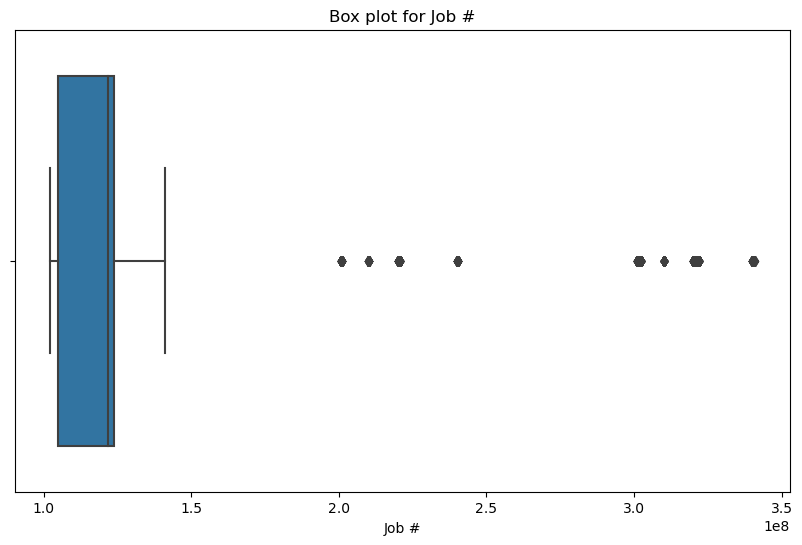

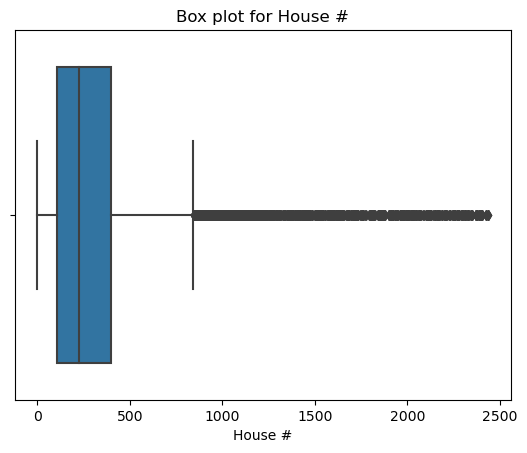

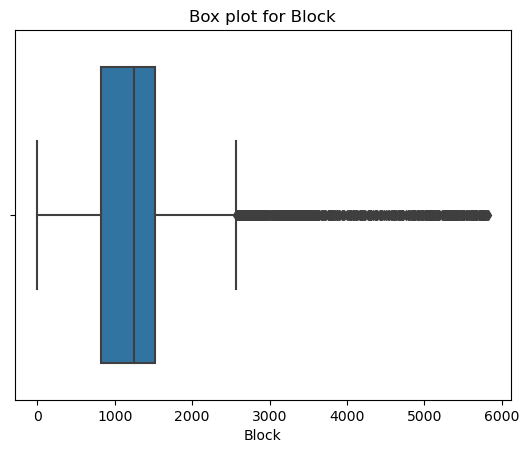

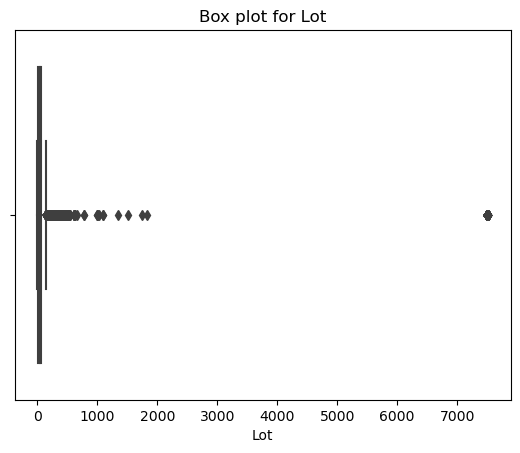

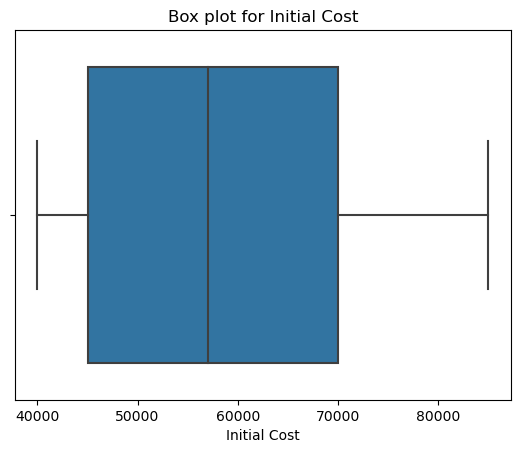

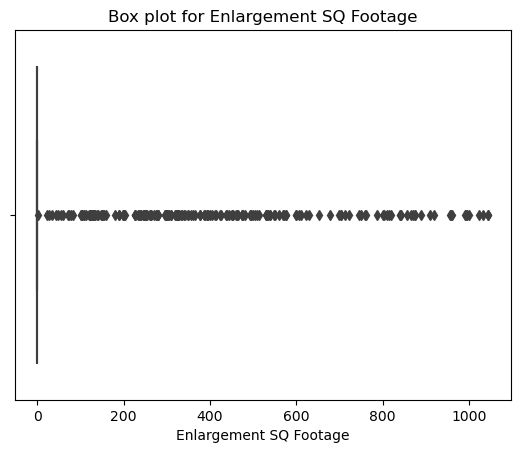

In [62]:
# Create box plots for each numerical column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [63]:
# Model Building

In [75]:
X = df.drop(columns=['Initial Cost', 'Horizontal Enlrgmt', 'Vertical Enlrgmt' ], axis=1)
X.head()

,Job #,Borough,House #,Street Name,Block,Lot,Job Type,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,year,month,day
0,123768976,0,1598.0,121,1545,49,0,0,0,13,2003,1,29
1,140922893,0,160.0,723,1517,43,0,0,0,140,2020,7,14
2,301773579,1,65.0,1289,1962,86,1,0,0,129,2007,5,23
3,301976057,1,1401.0,1597,1245,35,0,0,0,140,2006,2,28
4,301989276,1,154.0,1576,2573,10,1,0,0,30,2006,9,29


In [76]:
y = df['Initial Cost']
y.head()

0    65000.0
1    85000.0
2    60000.0
3    75000.0
4    40000.0
Name: Initial Cost, dtype: float64

In [77]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)

(10807, 13)
(10807,)


In [79]:
print(X_test.shape)
print(y_test.shape)

(2702, 13)
(2702,)


In [80]:
X.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Job Type', 'Proposed Zoning Sqft', 'Enlargement SQ Footage',
       'Zoning Dist1', 'year', 'month', 'day'],
      dtype='object')

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X=X_train, y=y_train)
print('R squared of the Linear Regression on training set:', lin_reg.score(X_train, y_train))

R squared of the Linear Regression on training set: 0.01029766916132202


In [83]:
y_pred = lin_reg.predict(X_test)

In [84]:
from sklearn import metrics 
print('Mean Absolute Error of the Linear Regression on test set is :',metrics.mean_absolute_error(y_test, y_pred) )

Mean Absolute Error of the Linear Regression on test set is : 11754.403833755287


In [87]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error of the Random Forest Regressor on test set is {:.2f}'.format(mse))

Mean Squared Error of the Random Forest Regressor on test set is 188475170.76


In [88]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
y_pred2 = rf.predict(X_test)
print('Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred2)))
mse = mean_squared_error(y_test, y_pred2)
print('Mean Squared Error of the Random Forest Regressor on test set is {:.2f}'.format(mse))

R squared of the Random Forest Regressor on training set: 86.74%
Mean Absolute Error of the Random Forest Regressor on test set is 11066.72
Mean Squared Error of the Random Forest Regressor on test set is 177849719.04


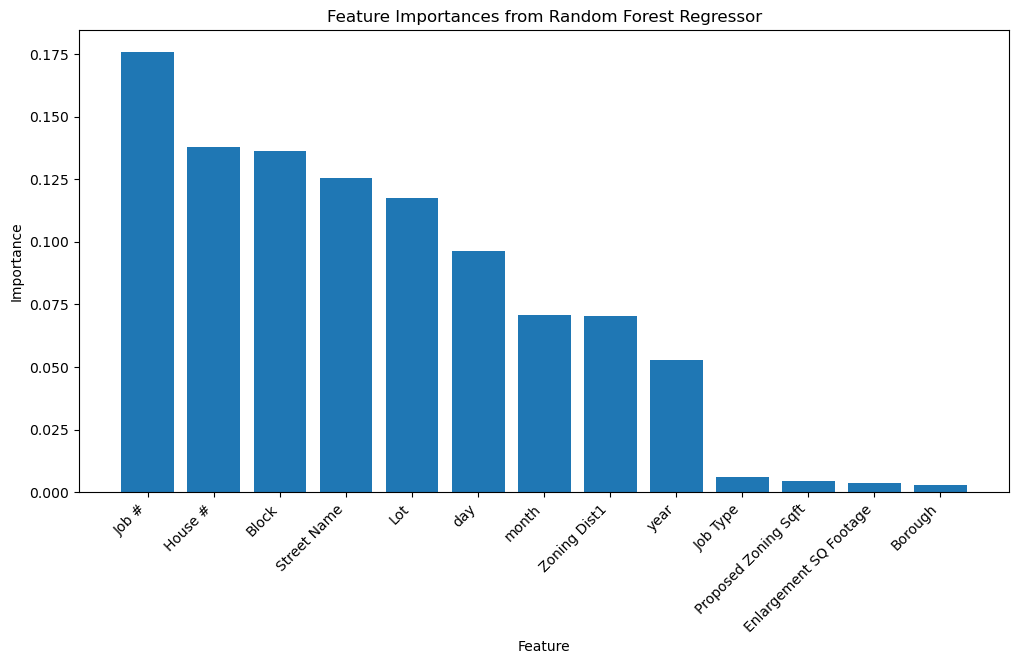

In [89]:
import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

feature_names = X_train.columns

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest Regressor')
plt.xticks(rotation=45, ha='right')
plt.show()

In [90]:
print(rf.feature_importances_)

[0.17575534 0.00293943 0.13806075 0.12550716 0.13608284 0.11742931
 0.00589872 0.00432556 0.00381    0.07033291 0.0526951  0.07078191
 0.09638096]


In [91]:
print(rf.feature_names_in_)

['Job #' 'Borough' 'House #' 'Street Name' 'Block' 'Lot' 'Job Type'
 'Proposed Zoning Sqft' 'Enlargement SQ Footage' 'Zoning Dist1' 'year'
 'month' 'day']


In [93]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree.score(X_train, y_train)))
y_pred1 = tree.predict(X_test)
print('Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred1)))
mse = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error of the Random Forest Regressor on test set is {:.2f}'.format(mse))


R squared of the Decision Tree Regressor on training set: 99.76%
Mean Absolute Error of the Decision Tree Regressor on test set is 13971.13
Mean Squared Error of the Random Forest Regressor on test set is 330474463.36


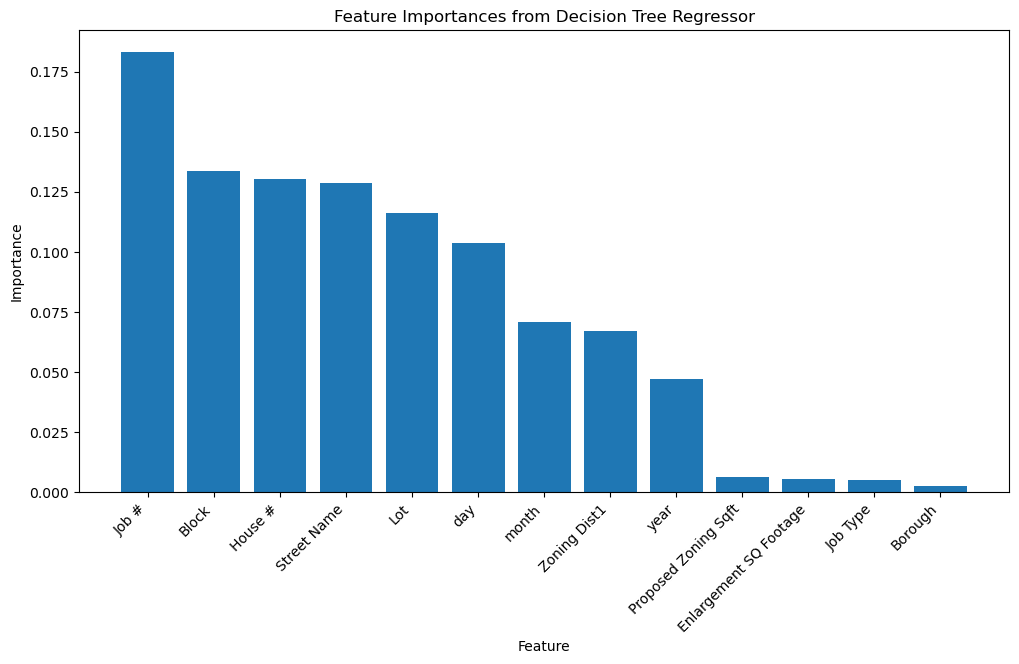

In [94]:
import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importances = tree.feature_importances_

# Get the column names from your dataset
feature_names = X_train.columns

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree Regressor')
plt.xticks(rotation=45, ha='right')
plt.show()
